# Problem Set 4, due March 16 at 11:59pm

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import random
%matplotlib inline   
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()


---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [3]:
# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.keys())
# print(bdata.feature_names)
# print(bdata.data.shape)
# print(bdata.target.shape)
# print(bdata.DESCR)

# Your code here
#df = pd.DataFrame(bdata.data, columns=bdata.feature_names)
#df['MEDV'] = bdata.target
df = pd.read_csv('data.txt', sep=" ", header=None) 
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
target = pd.read_csv('MEDV.txt', sep=" ", header=None) 
df.insert(13, "MEDV", target, True) 



regr_1 = LinearRegression()
regr_1.fit(df[['RM']], df['MEDV'])
r_1 = regr_1.score(df[['RM']], df['MEDV'])

print('First regression')
print('Coefficient: {:.2f}'.format(regr_1.coef_[0]))
print('Intercept: {:.2f}'.format(regr_1.intercept_))
print('R square: {:.2f}'.format(r_1))

df_2 = df.copy()
df_2['RM_square'] = df_2['RM'] ** 2

regr_2 = LinearRegression()
regr_2.fit(df_2[['RM', 'RM_square']], df_2['MEDV'])
r_2 = regr_2.score(df_2[['RM', 'RM_square']], df_2['MEDV'])
print('\nSecond regression')
print('Coefficient of RM: {:.2f}'.format(regr_2.coef_[0]))
print('Coefficient of RM square: {:.2f}'.format(regr_2.coef_[1]))
print('Intercept: {:.2f}'.format(regr_2.intercept_))
print('R square: {:.2f}'.format(r_2))

First regression
Coefficient: 8.96
Intercept: -35.58
R square: 0.47

Second regression
Coefficient of RM: -23.79
Coefficient of RM square: 2.47
Intercept: 71.74
R square: 0.54


In the bivariate linear regression, we estimate that the median housing price will increase by roughly $9100 for each additional room in the house.

Using the second model, we observe a quadratic relationship between median housing price and number of rooms.  The positive quadratic term and negative linear term indicate convex curvature, i.e. housing price increases more steeply for houses with a greater number of rooms.

The second regression can explain more variability of median housing price. Adding variables to a regression will usually increase the R square.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 25-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 25 slope coefficients using a histogram, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

In [4]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=25)
slope = []
for train_index, test_index in kf.split(df):
    regr = LinearRegression()
    df_train = df.ix[train_index]
    regr.fit(df_train[['RM']], df_train['MEDV'])
    slope.append(regr.coef_[0])

/home/dimitris/miniconda3/envs/drl2/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


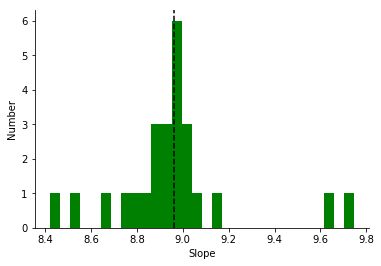

In [5]:
ax = plt.subplot(111)
ax.hist(slope, 30, color='g')
plt.xlabel('Slope')
plt.ylabel('Number')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(regr_1.coef_[0], color='k', linestyle='--')

The distribution of slope coefficients estimated with k-fold cross validation centered very close to the  coefficient value estimated through OLS on the full dataset.

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

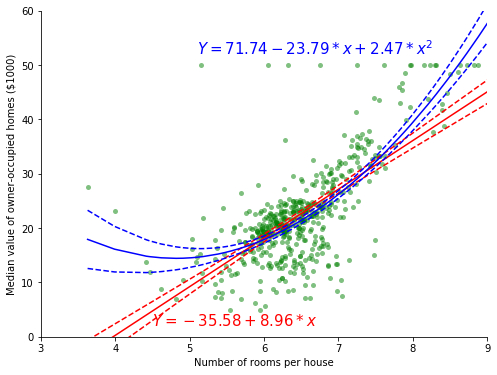

In [6]:
from statsmodels.stats.outliers_influence import summary_table
import statsmodels.api as sm
df_2 = df_2.sort_values(by='RM')
x = df_2['RM']
y = df_2['MEDV']
X = sm.add_constant(x)

ols = sm.OLS(y, X).fit()
st, data, ss2 = summary_table(ols, alpha=0.05)
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

linear_eq = 'Y = {:.2f} + {:.2f}*x'.format(regr_1.intercept_, regr_1.coef_[0])
quad_eq = 'Y = {:.2f}  {:.2f}*x + {:.2f}*x^2'.format(regr_2.intercept_, regr_2.coef_[0], regr_2.coef_[1])

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', c='g', markersize=5, markeredgecolor='none', alpha=0.5)
ax.plot(X, fittedvalues, 'r-', label='OLS')
ax.plot(X, predict_mean_ci_low, 'r--')
ax.plot(X, predict_mean_ci_upp, 'r--')

x = df_2[['RM', 'RM_square']]
y = df_2['MEDV']
X = sm.add_constant(x)

ols = sm.OLS(y, X).fit()

st, data, ss2 = summary_table(ols, alpha=0.05)
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

#print(type(X['RM']))
ax.plot(X['RM'], fittedvalues, 'b-', label='OLS')
ax.plot(X['RM'], predict_mean_ci_low, 'b--')
ax.plot(X['RM'], predict_mean_ci_upp, 'b--')
plt.xlabel('Number of rooms per house')
plt.ylabel('Median value of owner-occupied homes ($1000)')
ax.set_xlim(3,9)
ax.set_ylim(0,60)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.text(4.5, 2, r'$' + linear_eq + '$', fontsize=15, color='r')
ax.text(5.1, 52, r'$' + quad_eq + '$', fontsize=15, color='b')
plt.show()

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [8]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    alpha = 0.0
    beta = 0.0
    n = len(xvalues)
    cost = np.inf
    epsilon = 1e-6
    xvaluest = np.array(xvalues)
    yvaluest = np.array(yvalues)
    for i in range(MaxIterations):
        alpha_old = alpha
        beta_old = beta
        cost_old = cost
        #IPython.embed()
#         idx = np.random.choice(len(xvaluesg), 30, replace  =False)
#         xvaluest=xvaluesg[idx]
#         yvaluest=yvaluesg[idx]
        #IPython.embed()
        #print(i)
        alpha -= R / n * ((alpha + beta * xvaluest - yvaluest).sum())
        beta -= R / n * (((alpha_old + beta * xvaluest - yvaluest) * xvaluest).sum())
        cost = 1.0 / (2 * n) * (((alpha + beta * xvaluest - yvaluest) ** 2).sum())
#         if cost_old - cost < 0:
#             print('not converge stopped after iteration times: {}'.format(i))
#             break
        if abs(alpha - alpha_old) < epsilon and abs(beta - beta_old) < epsilon:
            print('cost < 0.0001 stopped after iteration times: {}'.format(i))
            break
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta


print("OLS  model parameters\n intercept: {:.2f}, coefficient: {:.2f}".format(regr_1.intercept_, regr_1.coef_[0]))

# print('\nTest 1')
# print(bivariate_ols(df['RM'], df['MEDV'], 0.001, 10000000000))

print('\nTest 2')
print(bivariate_ols(df['RM'], df['MEDV'], 0.01, 100000))

print('\nTest 3')
print(bivariate_ols(df['RM'], df['MEDV'], 0.001, 1000000))

print('\nTest 4')
print(bivariate_ols(df['RM'], df['MEDV'], 0.1, 1000000))

OLS  model parameters
 intercept: -35.58, coefficient: 8.96

Test 2
cost < 0.0001 stopped after iteration times: 72883
Time taken: 2.05 seconds
(-35.56745311896449, 8.95859287158155)

Test 3
cost < 0.0001 stopped after iteration times: 527252
Time taken: 14.84 seconds
(-35.48865117951902, 8.946581040638165)

Test 4


/home/dimitris/miniconda3/envs/drl2/lib/python3.6/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/dimitris/miniconda3/envs/drl2/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in square
/home/dimitris/miniconda3/envs/drl2/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


Time taken: 27.87 seconds
(nan, nan)


Gradient descent failed to converge with a learning rate of 0.1. However, with smaller learning rates, gradient descent converged to parameter values very similar to the coefficients computed via the OLS packages. Smaller learning rates require more iterations and thus take longer to complete.

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [9]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [10]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    n, variable_n = xvalue_matrix.shape # sample number, varaibels number
    alpha = 0.0
    beta_array = np.transpose(np.array([[0.0] * variable_n]))
    cost = np.inf
    epsilon = 0.00001
    for i in range(MaxIterations):
        cost_old = cost
        alpha_old = alpha
        beta_array_old = np.copy(beta_array)
        # part_1: alpha + beta*x - y
        part_1 = alpha_old + np.dot(xvalue_matrix, beta_array_old) - yvalues
        alpha -= R / n * (part_1.sum())
        beta_array -= R / n * (np.dot(xvalue_matrix.T, part_1))
        part_2 = alpha + np.dot(xvalue_matrix, beta_array) - yvalues
        cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
        if cost_old - cost < 0:
            print('not converge stopped after iteration times: {}'.format(i))
            break
        if abs(alpha-alpha_old) < epsilon and max(abs(beta_array-beta_array_old)) < epsilon:
            print('cost < 0.00001 stopped after iteration times: {}'.format(i))
            break
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

In [11]:
df_cp = df.copy()
df_norm = standardize(df_cp)
df_norm['MEDV'] = df['MEDV']
print('Test 1')
print(multivariate_ols(df_norm[['RM', 'CRIM']], df_norm['MEDV'], 0.1, 2000000))

print('\nTest 2')
print(multivariate_ols(df_norm[['RM', 'CRIM']], df_norm['MEDV'], 0.01, 100000))

print('\nTest 3')
print(multivariate_ols(df_norm[['RM', 'CRIM']], df_norm['MEDV'], 0.001, 100000))

Test 1
cost < 0.00001 stopped after iteration times: 119
Time taken: 0.01 seconds
(22.53273356013559, array([[ 5.81768643],
       [-2.24292767]]))

Test 2
cost < 0.00001 stopped after iteration times: 998
Time taken: 0.07 seconds
(22.531823728800912, array([[ 5.81703727],
       [-2.24354131]]))

Test 3
cost < 0.00001 stopped after iteration times: 7717
Time taken: 0.24 seconds
(22.52282350016782, array([[ 5.81303088],
       [-2.24694891]]))


In [12]:
regr_3 = LinearRegression()
regr_3.fit(df_norm[['RM', 'CRIM']], df_norm['MEDV'])
print('Intercept: {:.2f}'.format(regr_3.intercept_))
print('Coefficient of RM: {:.2f}'.format(regr_3.coef_[0]))
print('Coefficient of CRIM: {:.2f}'.format(regr_3.coef_[1]))

Intercept: 22.53
Coefficient of RM: 5.82
Coefficient of CRIM: -2.24


Here we have implemented a vectorized version of gradient descent that is much faster than the naive implementation.  When the features are standardized, the algorithm converges quickly. However, with standardized features, it is harder to literally interpret the coefficients, as they relate to a 1-SD increase in our independent variable.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [12]:
print('Test 1')
print(multivariate_ols(df[['RM', 'CRIM']], df['MEDV'], 0.1, int(1e6)))

print('\nTest 2')
print(multivariate_ols(df[['RM', 'CRIM']], df['MEDV'], 0.01, int(1e6)))

print('\nTest 3')
print(multivariate_ols(df[['RM', 'CRIM']], df['MEDV'], 0.001, int(1e6)))

Test 1
not converge stopped after iteration times: 1
Time taken: 0.00 seconds
(-7.5760786270401805, array([[-48.2463064 ],
       [-73.45543246]]))

Test 2
cost < 0.00001 stopped after iteration times: 54463
Time taken: 1.70 seconds
(-29.8834699081394, array([[ 8.23528018],
       [-0.26139415]]))

Test 3
cost < 0.00001 stopped after iteration times: 327704
Time taken: 10.55 seconds
(-29.03550676016863, array([[ 8.10756091],
       [-0.26419977]]))


In [13]:
regr_4 = LinearRegression()
regr_4.fit(df[['RM', 'CRIM']], df['MEDV'])
print('Intercept: {:.3f}'.format(regr_4.intercept_))
print('Coefficient of RM: {:.3f}'.format(regr_4.coef_[0]))
print('Coefficient of CRIM: {:.3f}'.format(regr_4.coef_[1]))

Intercept: -29.978
Coefficient of RM: 8.249
Coefficient of CRIM: -0.261


When we do not standardize our features, our algorithm does not always converge, or it takes a very long time to do so. However, for an appropriate learning rate (e.g., R=0.01), we observe convergence to the same coefficients estimated through standard statistical packages (such as sklearn). In this case, the relationship indicates that an increase in the crime rate of one unit is associated with a drop in housing prices of \$29302, and a one-unit increase in the number of rooms is associated with a decrease in prices of \$262. Note that when controlling for crime, the relationship between rooms and prices is different than it was in the 1.1. Note that when R = 0.001, the coefficient is not as good as that when R = 0.01 because the epsilon is not small enough. We will get better results with smaller epsilon.

### **2.5 Implement  Mini-Batch Gradient Descent (MB-GD)**
MB-GD is a Gradient Descent variant that in large data sets can converge faster and is computationally less intensive. Implement MB-GD for question 2.3 standardizing your features. Tune the learning rate, number of iterations and "mini-batch" size
so that you compute the estimates within a 1e-2 tolerance. Do not use a batch-size greater than 32.
MB-GD is similar to Stochastic Gradient Descent but instead of using one sample to compute the gradient we use a batch of samples at each iteration. You can find details about MB-GD here:
https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [14]:
from sklearn.utils import shuffle

"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def MBGD_multivariate_ols(xvalue_matrix, yvalues, R, EPOCHS, BATCH_SIZE):
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    n, variable_n = xvalue_matrix.shape # sample number, varaibels number
    alpha = 0.0
    beta_array = np.transpose(np.array([[0.0] * variable_n]))
    cost = np.inf
    epsilon = 0.00001
    cost_l = []
    for i in range(EPOCHS):
        cost_old = cost
        alpha_old = alpha
        beta_array_old = np.copy(beta_array) 
        X, y = shuffle(xvalue_matrix, yvalues)
        for offset in range(0, n, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X[offset:end], y[offset:end]
            part_1 = alpha_old + np.dot(batch_x, beta_array_old) - batch_y 
            alpha -= R / n * (part_1.sum())
            beta_array -= R / n * (np.dot(batch_x.T, part_1))
            part_2 = alpha + np.dot(batch_x, beta_array) - batch_y 
            cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
            cost_l.append(cost)
#         if cost_old - cost < 0:
#             print('not converge stopped after iteration times: {}'.format(i))
#             break
        if abs(alpha-alpha_old) < epsilon and max(abs(beta_array-beta_array_old)) < epsilon:
            print('cost < 0.00001 stopped after iteration times: {}'.format(i))
            break
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

In [15]:
print('MBGD Test 1')
print(MBGD_multivariate_ols(df[['RM', 'CRIM']], df['MEDV'], 0.01, int(1e5), 32))

MBGD Test 1
cost < 0.00001 stopped after iteration times: 54463
Time taken: 26.33 seconds
(-29.883469908139073, array([[ 8.23528018],
       [-0.26139415]]))


## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

*NOTE: * If using k-fold cross-validation, you will end up with a different set of parameters for each fold. In this case, use the parameters from the fold that has the highest test performance.

In [16]:
def compute_rmse(predictions, yvalues):
    P = np.array(predictions)
    Y = np.array(yvalues)
    rmse = ((P-Y)**2).sum()*1.0 / len(P) 
    rmse = np.sqrt(rmse)
    return rmse
    

In [17]:
kf = KFold(n_splits=10)
slope = []
r_all = []
rmse_all = []
for train_index, test_index in kf.split(df):
    df_train = df.loc[train_index]# or ix if loc not working
    df_test = df.loc[test_index]
    df_train_norm = standardize(df_train)
    df_train_norm['MEDV'] = df_train['MEDV']
    df_test_norm = standardize(df_test)
    df_test_norm['MEDV'] = df_test['MEDV']
    
    alpha, beta_array = multivariate_ols(df_train_norm[['RM', 'CRIM']], df_train_norm['MEDV'], 0.001, 100000)
    r_all.append([alpha, beta_array[0][0], beta_array[1][0]])
    
    predict = alpha + beta_array[0][0] * df_test_norm['RM'] + beta_array[1][0] * df_test_norm['CRIM']
    rmse_this = compute_rmse(predict, df_test_norm['MEDV'])
    rmse_all.append(rmse_this)

cost < 0.00001 stopped after iteration times: 7727
Time taken: 0.29 seconds
cost < 0.00001 stopped after iteration times: 7708
Time taken: 0.23 seconds
cost < 0.00001 stopped after iteration times: 7739
Time taken: 0.23 seconds
cost < 0.00001 stopped after iteration times: 7673
Time taken: 0.26 seconds
cost < 0.00001 stopped after iteration times: 7691
Time taken: 0.23 seconds
cost < 0.00001 stopped after iteration times: 7672
Time taken: 0.24 seconds
cost < 0.00001 stopped after iteration times: 7720
Time taken: 0.23 seconds
cost < 0.00001 stopped after iteration times: 7741
Time taken: 0.23 seconds
cost < 0.00001 stopped after iteration times: 7759
Time taken: 0.23 seconds
cost < 0.00001 stopped after iteration times: 7735
Time taken: 0.23 seconds


In [18]:
r_all

[[22.75221374171198, 5.889328072568168, -2.4234878053682567],
 [22.322983249369535, 5.92249812001736, -2.3519426560592285],
 [23.021446980993673, 5.909733383849141, -2.4482897435164737],
 [21.547821494878967, 5.000550469829915, -2.2980456997063308],
 [21.93968957372664, 5.403444736560648, -2.3218342396730507],
 [21.52826012966589, 4.985785098695984, -2.3261665966052023],
 [22.59790866433127, 5.997561838285927, -2.396626041823548],
 [23.08145977163707, 6.489148306356015, -1.7117325826899954],
 [23.500977359510326, 6.328703592372841, -1.6877681420067419],
 [22.93102649929344, 5.989578800363119, -2.3598142917755114]]

In [19]:
min_idx = np.argsort(rmse_all)[0]
print('Minimum RMSE: {:.2f}'.format(rmse_all[min_idx]))
print(r_all[min_idx])

Minimum RMSE: 4.14
[22.322983249369535, 5.92249812001736, -2.3519426560592285]


As with problems 1.1 and 1.2, we see that the distribution of parameter estimates from k-fold cross-validation are close to the parameters estimated without carefully separating our training and testing datasets. Small deviations are expected, as the parameters are being fit on a subset of the original data.

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above, predict the values for just the test instances, and compare the actual to the predicted values. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [20]:
print('Mean RMSE: {:.2f}'.format(np.mean(rmse_all)))

Mean RMSE: 8.54


The exact RMSE will depend on the randomized split, as well as the parameters used for kNN. In any case the RMSE should be close to RMSE of that obtained through KNN.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [21]:
df_norm['EXPENSIVE'] = df_norm.apply(lambda x: 1 if x['MEDV']>40 else 0, axis=1)

def multivariate_lg(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    n, variable_n = xvalue_matrix.shape # sample number, varaibels number
    alpha = 0.0
    beta_array = np.transpose(np.array([[0.0] * variable_n]))
    cost = np.inf
    epsilon = 0.0001
    for i in range(MaxIterations):
        cost_old = cost
        alpha_old = alpha
        beta_array_old = np.copy(beta_array)
        part_1 = 1.0 /(1 + np.exp(-(alpha_old + np.dot(xvalue_matrix, beta_array_old)))) - yvalues
        alpha -= R / n * (part_1.sum())
        beta_array -= R / n * (np.dot(np.transpose(xvalue_matrix), part_1))
        part_2 = 1.0 /(1 + np.exp(-(alpha + np.dot(xvalue_matrix, beta_array)))) - yvalues
        y_predict = 1.0 /(1 + np.exp(-(alpha + np.dot(xvalue_matrix, beta_array))))
        cost = np.sum(- yvalues * np.log(y_predict) - (1 - yvalues) * np.log(1 - y_predict))
        if cost_old - cost < 0:
            print('not converge stopped after iteration times: {}'.format(i))
            break
        if abs(alpha-alpha_old) < epsilon and max(abs(beta_array-beta_array_old)) < epsilon:
            print('cost < 0.00001 stopped after iteration times: {}'.format(i))
            break
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

multivariate_lg(df_norm[['CHAS','RM']], df_norm['EXPENSIVE'], 0.1, 100000)

cost < 0.00001 stopped after iteration times: 2969
Time taken: 0.40 seconds


(-4.374887391488019, array([[0.3115166 ],
        [2.03463571]]))

In [22]:
def f_log(x):
    denom=(1.0+ np.exp(-(alpha+beta_array[0][0]*x[:,0]+beta_array[1][0]*x[:,1])))
    return 1.0/denom

In [23]:
n = len(df)
rand_order = np.arange(0, n)
np.random.shuffle(rand_order)

ylog=np.where(bdata.target>40,1.0,0.0)

bdata_train = bdata.data[rand_order[:int(n*.66)],:]
bdata_train_tar = ylog[rand_order[:int(n*.66)]]
bdata_train_norm = standardize(bdata_train)

#test data
bdata_test = bdata.data[rand_order[int(n*.66):],:]
bdata_test_tar = ylog[rand_order[int(n*.66):]]
bdata_test_norm = standardize(bdata_test)

alpha, beta_array = multivariate_lg(bdata_train_norm[:,(3,5)], bdata_train_tar, 0.1, 100000)
yhat_log=f_log(bdata_test_norm[:, (3,5)])
yhat_log2=np.where(yhat_log>0.5, 1.0, 0.0)
print('Accuracy={}'.format((np.sum(yhat_log2==bdata_test_tar))*100/len(yhat_log)))

cost < 0.00001 stopped after iteration times: 5093
Time taken: 0.56 seconds
Accuracy=94.79768786127168


In [24]:
# baseline accuracy
acc = bdata_test_tar[bdata_test_tar==0].shape[0] / float(len(bdata_test_tar))
print('If we just guess 0 for all the samples, the accuracy is: {:.2f}'.format(acc))

If we just guess 0 for all the samples, the accuracy is: 0.92


The coefficients of CHAS and RM are 0.32, 2.09, respectively. If we use 0.5 as the threshold to determine whether it is expensive or not, the accuracy is 96% for the test set. We should not be too satisfied with the result because the dataset is very unbalanced. If we just guess nonexpensive for all the samples, the accuracy is 92%.

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [25]:
bdfc = df.copy()

cols = list(df.columns.values)[:-1]
cols_n = len(cols)
for i in range(cols_n):
    for j in range(i + 1):
        c_name = cols[i] + '_' + cols[j]
        bdfc[c_name] = bdfc[cols[i]] * bdfc[cols[j]]

tr = int(np.round(len(bdfc) * 66 / 100.0))
indices = np.arange(0, len(bdfc))
np.random.shuffle(indices)
trainingIndices = indices[:tr]
testingIndices = indices[tr:]
y=pd.DataFrame(bdfc.MEDV.copy())

y_tr=pd.DataFrame(bdfc.iloc[trainingIndices,:].MEDV)
y_test=pd.DataFrame(bdfc.iloc[testingIndices,:].MEDV)

bdf=standardize(bdfc)
del bdf['MEDV']

bdf_tr = bdf.iloc[trainingIndices,:]
bdf_test = bdf.iloc[testingIndices,:]
bdf_tr.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ...
       'LSTAT_CHAS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_AGE', 'LSTAT_DIS',
       'LSTAT_RAD', 'LSTAT_TAX', 'LSTAT_PTRATIO', 'LSTAT_B', 'LSTAT_LSTAT'],
      dtype='object', length=104)

### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [26]:
lst=[]
# for j in range(2, len(bdf_tr.columns)):
for j in range(2, 20):
    features=[each for each in bdf_tr.columns[:j]]

    x_tr=bdf_tr[features]
    x_test=bdf_test[features]
    ##############################################################################
    ##############################################################################
    # is this ones needed ??????????????????????????????
    ##############################################################################
    ##############################################################################
    x_tr=np.c_[np.ones(x_tr.shape[0]),x_tr]
    x_test=np.c_[np.ones(x_test.shape[0]),x_test]
    alpha, betas = multivariate_ols(x_tr, y_tr.MEDV, 0.001, 1000000)
    x_tr2=pd.DataFrame(x_tr)
    features_2=['Intercept']+features
    
    x_tr2.columns=features_2
    x_test2=pd.DataFrame(x_test)
    x_test2.columns=features_2
    yhat_train=alpha
    
    for i in range(j):
       yhat_train+=betas[i] *x_tr2[features_2[i]]
    
    rmse_tr=np.sqrt(mean_squared_error(yhat_train,y_tr.MEDV))

    yhat_test=alpha
    for i in range(j):
       yhat_test+=betas[i] *x_test2[features_2[i]]
    
    rmse_test=np.sqrt(mean_squared_error(yhat_test,y_test.MEDV))
    dc={}
    dc['NumberFeatures']=j
    dc['RMSE_Training']=rmse_tr
    dc['RMSE_Testing']=rmse_test
    lst.append(dc)

cost < 0.00001 stopped after iteration times: 5730
Time taken: 0.20 seconds
cost < 0.00001 stopped after iteration times: 6966
Time taken: 0.23 seconds
cost < 0.00001 stopped after iteration times: 8690
Time taken: 0.32 seconds
cost < 0.00001 stopped after iteration times: 11505
Time taken: 0.46 seconds
cost < 0.00001 stopped after iteration times: 7367
Time taken: 0.30 seconds
cost < 0.00001 stopped after iteration times: 7299
Time taken: 0.28 seconds
cost < 0.00001 stopped after iteration times: 18154
Time taken: 0.76 seconds
cost < 0.00001 stopped after iteration times: 18197
Time taken: 0.72 seconds
cost < 0.00001 stopped after iteration times: 35625
Time taken: 1.59 seconds
cost < 0.00001 stopped after iteration times: 34951
Time taken: 1.69 seconds
cost < 0.00001 stopped after iteration times: 37003
Time taken: 1.91 seconds
cost < 0.00001 stopped after iteration times: 40570
Time taken: 2.12 seconds
cost < 0.00001 stopped after iteration times: 38517
Time taken: 1.78 seconds
cost

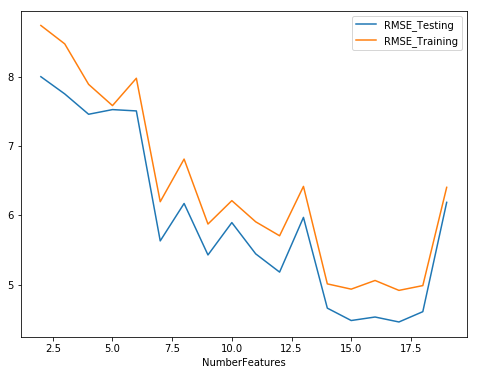

In [27]:
df_42=pd.DataFrame(lst).set_index('NumberFeatures')
df_42.plot(figsize=(8,6))

As we increase the number of features, our RMSE drops in both the testing and training sets. After roughly 15 features, the decline in RMSE slows substantially, and there is a growing "wedge" between the training RSME and test RMSE, where the training RMSE continues to drop but the test RMSE nearly plateaus. In many real-world scenarios, the test RMSE will even increase as we progressively overfit the training data. In this case, we do not have enough features to observe this type of dangerous overfitting.

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [28]:
# corporate alpha in the beta
# adding a new column with same value one into the X
def multivariate_regularized_ols(xvalue_matrix, y, R=0.01, MaxIterations=1000, lbd=1):
    # initialize the parameters
    start_time = time.time()
    n = xvalue_matrix.shape[0]                                      #number of (training) data points
    features = xvalue_matrix.shape[1]                               #number of features
    iter = 0
    epsilon = 0.00001                                               #stopping condition
    beta_array = np.random.random(features)    
    
    convergence=False
    for i in range(MaxIterations):
        iter += 1
        g_b=np.dot(xvalue_matrix.T,np.dot(xvalue_matrix,beta_array)-y )+np.dot(lbd,beta_array)
        beta_array = beta_array - R/n *g_b 
        #terminating condition
        if (abs(g_b) <= epsilon).all():
            convergence=True
            ttaken=str(round(time.time() - start_time,2)) 
            return  beta_array,ttaken,iter,convergence

    ttaken=str(round(time.time() - start_time,2)) 
    return beta_array,ttaken,iter,convergence

In [29]:
def f(x,betas):
    return np.dot(x,betas)

In [30]:
# use PolynomialFeatures function to generate interaction terms
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=False)

n = len(bdata.data)
rand_order = np.arange(0,n)
np.random.shuffle(rand_order)

bdata_train = bdata.data[rand_order[:int(n*.66)],:]
bdata_train_tar = bdata.target[rand_order[:int(n*.66)]]
bdata_test = bdata.data[rand_order[int(n*.66):],:]
bdata_test_tar = bdata.target[rand_order[int(n*.66):]]

x_train = standardize(bdata_train[:,0:13])
x_train = poly.fit_transform(x_train)
x_train = np.c_[np.ones(x_train.shape[0]),x_train]
x_train_tar = bdata_train_tar[:]

x_test = standardize(bdata_test[:,0:13])
x_test = poly.fit_transform(x_test)
x_test = np.c_[np.ones(x_test.shape[0]),x_test]
x_test_tar = bdata_test_tar[:]

beta_array = np.ones(x_train.shape[1])    

R = 0.01
lbd = 0.1
beta, timetaken, iterations, convergence = multivariate_regularized_ols(x_train, x_train_tar, R, 1000000,lbd)
print("lambda={}, R={}, timetaken={}, iterations={}, converegence={}".format(lbd,R,
      timetaken,iterations,convergence))
yhat_train = f(x_train,beta)
yhat_test = f(x_test,beta)
rmse_train = np.sqrt(mean_squared_error(yhat_train,x_train_tar))
rmse_test = np.sqrt(mean_squared_error(yhat_test,x_test_tar))
print("RMSE of training set: {:.2f}".format(rmse_train))
print("RMSE of testing set: {:.2f}\n".format(rmse_test))

lbd = 0.5
beta, timetaken, iterations, convergence = multivariate_regularized_ols(x_train, x_train_tar, R, 1000000,lbd)
print("lambda={}, R={}, timetaken={}, iterations={}, converegence={}".format(lbd, R,
      timetaken,iterations,convergence))
yhat_train = f(x_train,beta)
yhat_test = f(x_test,beta)
rmse_train = np.sqrt(mean_squared_error(yhat_train,x_train_tar))
rmse_test = np.sqrt(mean_squared_error(yhat_test,x_test_tar))
print("RMSE of training set: {:.2f}".format(rmse_train))
print("RMSE of testing set: {:.2f}\n".format(rmse_test))

lbd = 1
beta, timetaken, iterations, convergence = multivariate_regularized_ols(x_train, x_train_tar, R, 1000000,lbd)
print("lambda={}, R={}, timetaken={}, iterations={}, converegence={}".format(lbd,R,
      timetaken,iterations,convergence))
yhat_train = f(x_train,beta)
yhat_test = f(x_test,beta)
rmse_train = np.sqrt(mean_squared_error(yhat_train,x_train_tar))
rmse_test = np.sqrt(mean_squared_error(yhat_test,x_test_tar))
print("RMSE of training set: {:.2f}".format(rmse_train))
print("RMSE of testing set: {:.2f}\n".format(rmse_test))

lambda=0.1, R=0.01, timetaken=37.97, iterations=1000000, converegence=False
RMSE of training set: 2.29
RMSE of testing set: 5.59

lambda=0.5, R=0.01, timetaken=32.68, iterations=701811, converegence=True
RMSE of training set: 2.32
RMSE of testing set: 5.18

lambda=1, R=0.01, timetaken=14.96, iterations=388982, converegence=True
RMSE of training set: 2.35
RMSE of testing set: 4.95



With ridge regularization, we see only a very modest decrease in RMSE relative to the unregularized version. However, this is partly because we do not know that what should be the best value of lambda for regularization.

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

In [31]:
lambdas = list(np.linspace(0.1, 1, num=10))+list(np.linspace(2, 10, num=9))+list(np.linspace(15, 100, num=18))
lambdas.insert(0,0)
print(lambdas)

[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]


In [35]:
# use PolynomialFeatures function to generate interaction terms
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=False)

dict_lbd_rmse_train = {}
dict_lbd_rmse_test = {}
for lbd in lambdas:
    counter = 0.0
    rmse_train_sum = 0
    rmse_test_sum = 0
    # simulate 3 times to get the average value
    for i in range(3):
        n = len(bdata.data)
        rand_order = np.arange(0,n)
        np.random.shuffle(rand_order)

        bdata_train = bdata.data[rand_order[:int(n*.66)],:]
        bdata_train_tar = bdata.target[rand_order[:int(n*.66)]]
        
        #test data
        bdata_test = bdata.data[rand_order[int(n*.66):],:]
        bdata_test_tar = bdata.target[rand_order[int(n*.66):]]

        x_train = standardize(bdata_train[:,0:13])
        x_train = poly.fit_transform(x_train)
        x_train = np.c_[np.ones(x_train.shape[0]),x_train]
        x_train_tar = bdata_train_tar

        x_test = standardize(bdata_test[:,0:13])
        x_test = poly.fit_transform(x_test)
        x_test = np.c_[np.ones(x_test.shape[0]),x_test]
        x_test_tar = bdata_test_tar
        
        R = 0.01
        beta, timetaken, iterations, convergence = multivariate_regularized_ols(x_train, x_train_tar, R, 100000,lbd)
        a,b1,b2 = beta[0],beta[1],beta[2]
        
        yhat = f(x_train,beta)
        
        rmse_train = np.sqrt(mean_squared_error(yhat,x_train_tar))
        rmse_train_sum += rmse_train

        yhat = f(x_test,beta)
        rmse_test = np.sqrt(mean_squared_error(yhat,x_test_tar))
        rmse_test_sum += rmse_test
        counter += 1.0

    dict_lbd_rmse_train[lbd] = rmse_train_sum / counter
    dict_lbd_rmse_test[lbd] = rmse_test_sum / counter

        rmse_train  rmse_validation
lambda                             
0.0       2.102175         4.774862
0.1       2.298181         4.402074
0.2       2.191063         4.281672
0.3       2.299819         4.193990
0.4       2.331359         3.813541


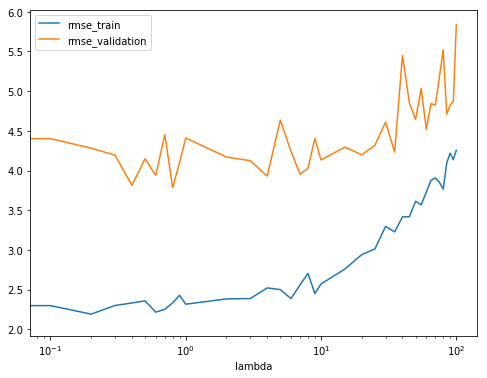

In [36]:
import matplotlib as plt
rmse_train_df=pd.DataFrame.from_dict(dict_lbd_rmse_train,orient='index').sort_index().reset_index()
rmse_test_df=pd.DataFrame.from_dict(dict_lbd_rmse_test,orient='index').sort_index().reset_index()
rmse_train_df.columns=['lambda','rmse_train']
rmse_test_df.columns=['lambda','rmse_validation']
merged_rmse=pd.merge(rmse_train_df,rmse_test_df,on='lambda').set_index('lambda')
print(merged_rmse.head())
ax=merged_rmse.plot(logx=True, figsize=(8,6))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(
    plt.ticker.FuncFormatter(lambda x, p: format(float(x), ',')))

In [37]:
merged_rmse.reset_index(inplace=True)
merged_rmse.sort_values('rmse_validation').head()

,lambda,rmse_train,rmse_validation
8,0.8,2.333376,3.785138
4,0.4,2.331359,3.813541
13,4.0,2.521294,3.929785
6,0.6,2.215688,3.938538
16,7.0,2.559925,3.953735


For this particular dataset, we don't see much in the way of performance improvements from ridge regularization. At best, we obtain a decrease of test RMSE to roughly 3.6 (from 4.1 in the earlier problem). We also note that very large levels of lambda certainly perform worse than more moderate levels.

###  Extra Credit 3: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in deep learning applications. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm.

In [83]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. 
    
Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def AdaGrad_ols(xvalue_matrix, yvalues, R=0.00001, MaxIterations=10000):
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    n, variable_n = xvalue_matrix.shape # sample number, varaibels number
    # initialize parameters
    params = np.random.randn(variable_n + 1, 1)
    cost = np.inf
    epsilon = 0.00001
    G = np.zeros((variable_n + 1, variable_n + 1))
    for i in range(MaxIterations):
        g = np.zeros((variable_n + 1, 1))
        cost_old = cost
        part_1 = params[0] + np.dot(xvalue_matrix, params[1:variable_n + 1]) - yvalues
        # populate gradient vector
        g[0] = part_1.sum()
        g[1:variable_n + 1] = np.dot(xvalue_matrix.T, part_1)
        # store outer product of past values of gradients 
        G += np.outer(g, g)
        # update parameters (gd steps)
        for j in range(variable_n + 1):
            params[j] -= R / n * g[j]/np.sqrt(np.diag(G)[j])
        part_2 = params[0] + np.dot(xvalue_matrix, params[1:variable_n + 1]) - yvalues
        #print(params[2])
        cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return params

In [88]:
df_cp = df.copy()
df_norm = standardize(df_cp)
#IPython.embed()
df_norm['MEDV'] = df['MEDV']
print('Test 1')
print(AdaGrad_ols(df_norm[['RM', 'CRIM', 'DIS']], df_norm['MEDV'], 100.5, 10000))


Test 1
Time taken: 1.32 seconds
[[22.01109499]
 [ 5.77630339]
 [-2.12722638]
 [ 0.32919241]]


In [40]:
regr_4 = LinearRegression()
regr_4.fit(df_norm[['RM', 'CRIM','DIS']], df_norm['MEDV'])
print('Intercept: {:.2f}'.format(regr_4.intercept_))
print('Coefficient of RM: {:.2f}'.format(regr_4.coef_[0]))
print('Coefficient of CRIM: {:.2f}'.format(regr_4.coef_[1]))
print('Coefficient of DIS: {:.2f}'.format(regr_4.coef_[2]))

Intercept: 22.53
Coefficient of RM: 5.78
Coefficient of CRIM: -2.13
Coefficient of DIS: 0.33
